In [15]:
#import all reuired packages
import pandas as pd
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('./data/merged_data.csv')

In [17]:
df.head()

,Content ID,User_ID,Category,Content Type,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,photo,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,photo,dislike,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,photo,scared,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,photo,disgust,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,photo,interested,positive,30


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    22534 non-null  object
 1   User_ID       22534 non-null  object
 2   Category      22534 non-null  object
 3   Content Type  22534 non-null  object
 4   Type          22534 non-null  object
 5   Sentiment     22534 non-null  object
 6   Score         22534 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


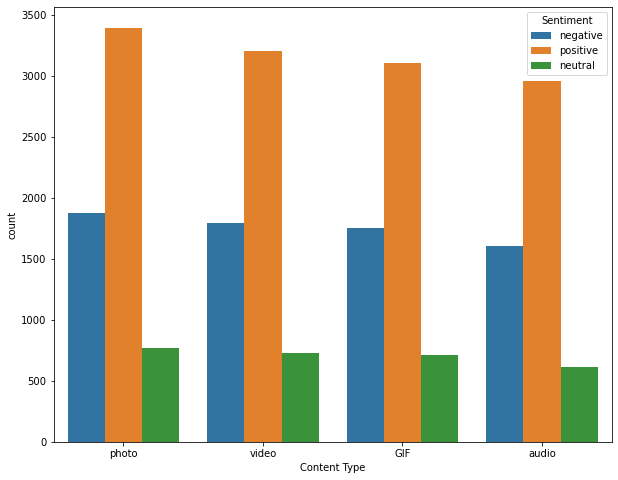

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Content Type'], hue='Sentiment', data=df)
plt.title('Different categories by sentiment')
plt.show()

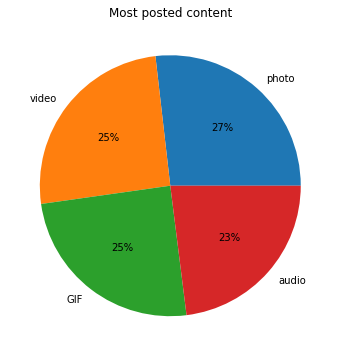

In [52]:
df['Content Type'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%', title='Most posted content', figsize=(8,6))
plt.ylabel("")
plt.show()

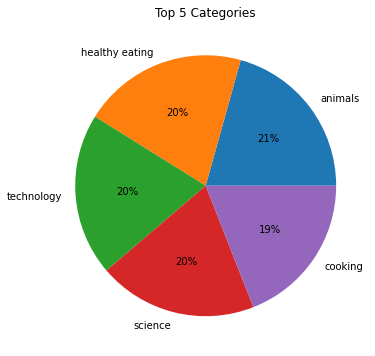

In [43]:
#plot top 5 categories
top5 = df.groupby('Category')['Score'].sum().sort_values(ascending=False)[:5]
top5.plot(kind = 'pie', autopct = '%0.0f%%', ylabel = '', title = 'Top 5 Categories',figsize = (8,6))
plt.show()

In [45]:
top5_sentiment = df.groupby(['Category', 'Type'])['Score'].sum().sort_values(ascending=False)[:5]
top5_sentiment = pd.DataFrame(top5_sentiment)
top5_sentiment = top5_sentiment.reset_index()
top5_sentiment

,Category,Type,Score
0,technology,adore,8280
1,healthy eating,adore,7704
2,animals,super love,7650
3,healthy eating,super love,7650
4,science,adore,7632


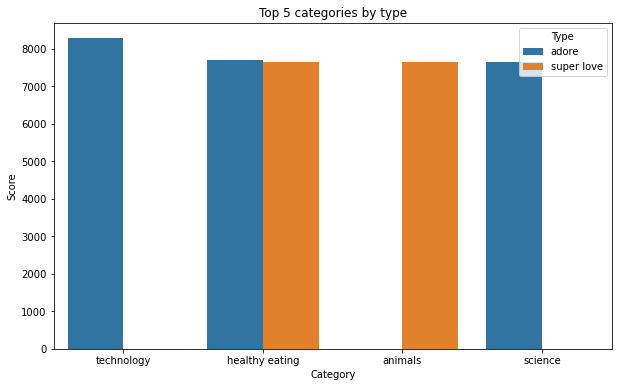

In [51]:
plt.figure(figsize=(10,6))
plt.title('Top 5 categories by type')
sns.barplot(x = 'Category', y = 'Score', hue = 'Type', data = top5_sentiment)
plt.show()